In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

* Template matching is the simplest form of object detection.
* It simply scans a larger image for a provided template by sliding the template target image across the larger image.
* The main option that can be adjusted is the comparison method used as the target template is slid across the larger image.
* As it slides, it compares or matches the template to the portion of the image directly under it.
* It does this matching by calculating a number. This number denotes the extent to which the template and the portion of the original are equal.
* The actual number depends on the calculation used. Some denote a complete match by a 0 (indicating no difference between the template and the portion of original) or a 1 (indicating a complete match).
* When you perform template matching in OpenCV, you get an image that shows the degree of "equality" or correlation between the template and the portion under the template.
* The opencv returns the correlation heatmap, with varying methods the result will be different.
* Following are the methods opencv uses: OpenCV offers six different calculation methods:
    * CV_TM_SQDIFF
    * CV_TM_SQDIFF_NORMED
    * CV_TM_CCORR
    * CV_TM_CCORR_NORMED
    * CV_TM_CCOEFF
    * CV_TM_CCOEFF_NORMED
* One downside it is that it is restrictive of template matching that you should already have the exact image you are looking for.
* This defeats the purpose of general object detection that's way it is the simplest form of object detection

* https://aishack.in/tutorials/template-matching/#:~:text=Template%20matching%20works%20by%20%22sliding,the%20image%20directly%20under%20it.&text=It%20does%20this%20matching%20by,of%20the%20original%20are%20equal.

In [7]:
cat = cv.imread('../Data/Cat 4K Pictures/2.jpg')
cat = cv.cvtColor(cat,cv.COLOR_BGR2RGB)
temp = cv.imread('../Data/Cat 4K Pictures/2 cut.jpg')
temp = cv.cvtColor(temp,cv.COLOR_BGR2RGB)

In [12]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR','cv.TM_CCORR_NORMED', 
           'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

In [18]:
test = cv.matchTemplate(cat,temp,eval(methods[3]))

In [20]:
# f = plt.figure(figsize = (14,12))
# f = f.add_subplot(111)
# f.imshow(test)

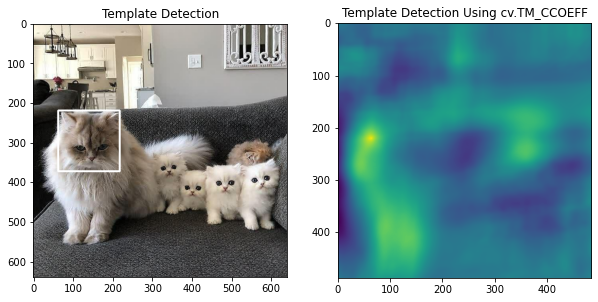

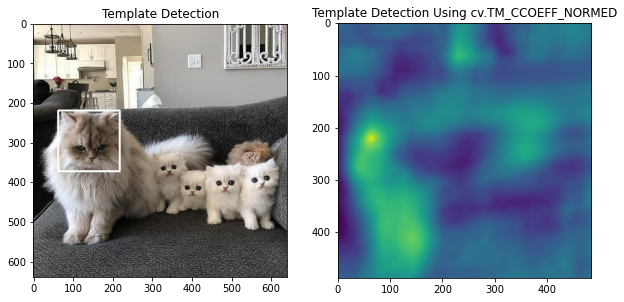

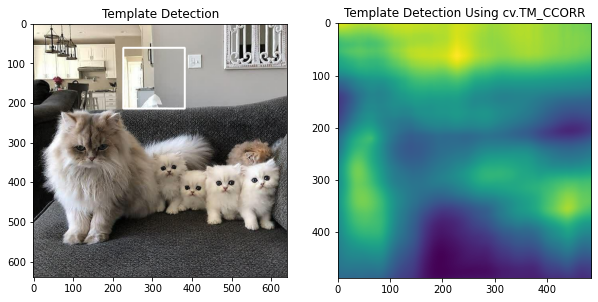

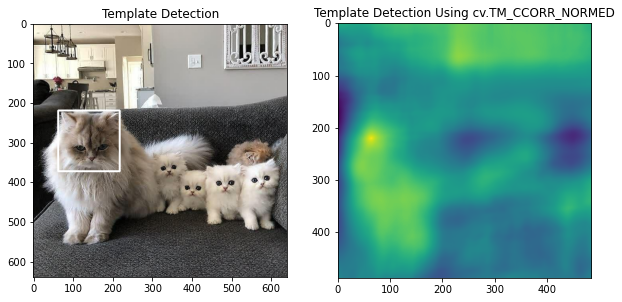

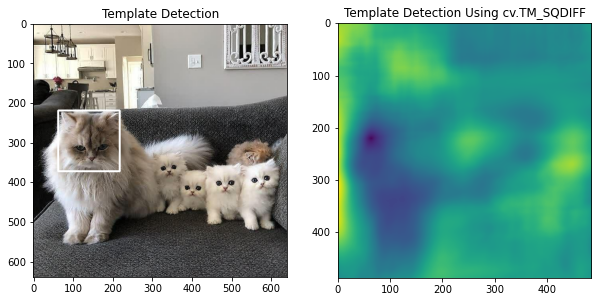

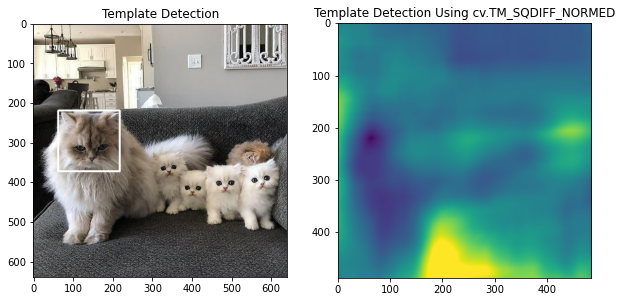

In [28]:
for m in methods:
    catcopy = cat.copy()
    
    tempcat = cv.matchTemplate(catcopy,temp,eval(m))
    
    minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(tempcat)
    
    if m in [methods[4],methods[5]]:
        topLeft = minLoc
    else:
        topLeft = maxLoc
    
    height , width , chnl = temp.shape
    
    btmRight = (topLeft[0]+width,topLeft[1]+height)
    
    cv.rectangle(catcopy,topLeft,btmRight,(255,255,255),3)
    
    f = plt.figure(figsize = (10,10))
    f = plt.subplot(121)
    f.imshow(catcopy)
    plt.title('Template Detection')
    
    f = plt.subplot(122)
    f.imshow(tempcat)
    plt.title(f'Template Detection Using {m}')